### Lec 02: Linear Regression

##### * Cost function (Loss function) 
###### - 회귀분석은 오차제곱합을 최소화 시킴으로서 최적 모델을 만든다 
###### - ML에서도 동일한 방법으로 Regression 모델을 training/fitting 시키며, 
###### - 회귀계수와 절편의 오차제곱합을 최소화 ~ f(x) = minimize(beta, a)를 cost(or loss) 함수라 부른다. 

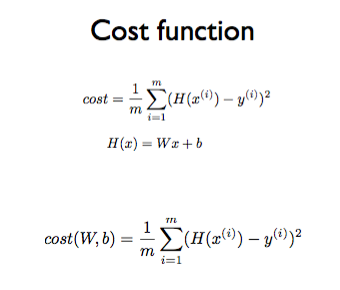

In [14]:
from IPython.display import Image
Image('img/213E983E5790FD3533.png')

In [1]:
#############################################################################

### Lab 02: Linear Regression with TensorFlow

In [2]:
#import tensorflow as tf
#tf.__version__

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#### *formula : H(x) = Wx + b 
x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random.normal([1]), name = 'wieght')   ## W변수의 타입과 이름 정의 (랜덤노멀, 1자리 수)
b = tf.Variable(tf.random.normal([1]), name = 'bias')     ## b변수의 타입과 이름 정의 

hypothesis = W*x_train + b

#### 오차제곱의 평균을 최소화하라 
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#### 경사하강법(Gradient Descent) 옵티마이저를 선언하고, 이를 최소화 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

#### 2) run/update graph 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001) : 
    sess.run(train)
    if step % 20 == 0:   #### 20의 배수인 경우만(20번에 한번씩만...)
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 11.952636 [-1.0862267] [1.1639532]
20 0.50077003 [0.14320517] [1.606951]
40 0.3609234 [0.29120114] [1.578821]
60 0.32694525 [0.33477] [1.5091348]
80 0.29692936 [0.36701006] [1.4386408]
100 0.26967594 [0.39685124] [1.371071]
120 0.24492393 [0.42520586] [1.3066396]
140 0.22244383 [0.4522199] [1.2452327]
160 0.20202713 [0.47796363] [1.1867114]
180 0.18348418 [0.5024975] [1.1309402]
200 0.16664328 [0.52587825] [1.0777903]
220 0.15134819 [0.54816014] [1.0271381]
240 0.13745683 [0.569395] [0.9788665]
260 0.12484052 [0.5896318] [0.9328634]
280 0.11338215 [0.6089176] [0.8890223]
300 0.102975495 [0.62729704] [0.8472415]
320 0.09352398 [0.64481276] [0.8074242]
340 0.08493999 [0.6615052] [0.76947826]
360 0.07714382 [0.6774132] [0.7333155]
380 0.070063226 [0.6925737] [0.69885224]
400 0.06363252 [0.70702165] [0.66600865]
420 0.057792082 [0.7207905] [0.6347087]
440 0.0524877 [0.73391235] [0.6048798]
460 0.047670204 [0.74641746] [0.57645273]
480 0.043294813 [0.7583349] [0.5493615]
500 0.03932104 [0

##### <font color = blue> --> 2000번 수행결과, cost는 점점 낮아지면서 W는 1 & b는 0에 수렴 </font>

In [4]:
#### cf. palceholder : 특정값을 지정하지 않고 나중에 값을 할당할 수 있는 공간만 할당 

a = tf.placeholder(dtype = tf.float32)
b = tf.placeholder(dtype = tf.float32)
add_node = a + b

print(sess.run(add_node, feed_dict = {a:3, b:4.5}))
print(sess.run(add_node, feed_dict = {a:[1,3], b:[2,4]}))

7.5
[3. 7.]


##### <font color = blue> *placeholder를 사용한 regression </font>
##### <font color = blue> --> placeholder의 장점, 모델을 먼저 만들어 놓고 feed_dict로 training 값(X,Y)을 나중에 던져 줄수 있다.  </font>

In [5]:
W = tf.Variable(tf.random.normal([1]), name = 'wieght')   ## W변수의 타입과 이름 정의 (랜덤노멀, 1자리 수)
b = tf.Variable(tf.random.normal([1]), name = 'bias')     ## b변수의 타입과 이름 정의 
X = tf.placeholder(dtype = tf.float32, shape = [None])
Y = tf.placeholder(dtype = tf.float32, shape = [None])

hypothesis = W*X + b 
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001): 
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train], 
                 feed_dict = {X:[1, 2, 3, 4, 5], 
                              Y:[2.1, 3.3, 4.2, 5.1, 6.4]})  
    if step % 20 == 0: 
        print(step, cost_val, W_val, b_val)

0 0.87602854 [1.4729023] [-0.83377045]
20 0.5926153 [1.5332742] [-0.68255144]
40 0.5188496 [1.50137] [-0.5656998]
60 0.45443282 [1.4711565] [-0.45661137]
80 0.39817712 [1.4429196] [-0.3546676]
100 0.3490488 [1.416532] [-0.2594003]
120 0.30614442 [1.3918726] [-0.17037208]
140 0.26867574 [1.3688283] [-0.08717439]
160 0.23595409 [1.347293] [-0.00942542]
180 0.20737818 [1.3271681] [0.06323172]
200 0.18242253 [1.3083613] [0.13113055]
220 0.16062856 [1.290786] [0.1945826]
240 0.14159563 [1.2743618] [0.25387916]
260 0.12497409 [1.2590133] [0.30929223]
280 0.11045845 [1.24467] [0.3610763]
300 0.097781815 [1.231266] [0.409469]
320 0.08671119 [1.2187399] [0.45469233]
340 0.07704313 [1.2070341] [0.49695405]
360 0.06859996 [1.1960949] [0.53644806]
380 0.061226446 [1.1858722] [0.57335544]
400 0.054787107 [1.1763189] [0.6078457]
420 0.049163617 [1.1673912] [0.6400774]
440 0.044252526 [1.1590482] [0.67019796]
460 0.039963666 [1.1512517] [0.6983461]
480 0.036218192 [1.1439657] [0.7246507]
500 0.032947

In [8]:
#### Test the model : 생성된 모델에 대해 X값을 주었을때 적합한 Y값이 나오는지 확인 
print(sess.run(hypothesis, feed_dict = {X:[5]}))
print(sess.run(hypothesis, feed_dict = {X:[2.5]}))
print(sess.run(hypothesis, feed_dict = {X:[1.2, 3.4]}))
print(sess.run(hypothesis, feed_dict = {X:[5, 4, 3, 2, 1]}))

[6.3008404]
[3.699329]
[2.346543  4.6358733]
[6.3008404 5.260236  4.219631  3.1790266 2.138422 ]
